# Reproducibility with original data (DLPFC)

This tutorial demonstrates how to pseudo-spatiotemporal analysis on 10X Visium human dorsolateral prefrontal cortex data using Pysodb and SpaceFlow.

A reference paper can be found at https://www.nature.com/articles/s41467-022-31739-w.

This tutorial refers to the following tutorial at https://github.com/hongleir/SpaceFlow/blob/master/tutorials/seqfish_mouse_embryogenesis.ipynb. At the same time, the way of loadding data is modified by using Pysodb.

## Import packages and set configurations

In [1]:
# Use the Python warnings module to filter and ignore any warnings that may occur in the program after this point.
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Import several python packages commonly used in data analysis and visualization.
# numpy (imported as np) is a package for numerical computing with arrays.
import numpy as np
# scanpy (imported as sc) is a package for single-cell RNA sequencing analysis.
import scanpy as sc
# matplotlib.pyplot (imported as plt) is a package for data visualization.
import matplotlib.pyplot as plt

In [3]:
# from SpaceFlow package import SpaceFlow module
from SpaceFlow import SpaceFlow

In [4]:
# Imports a palettable package
import palettable
# Create three variables with lists of colors for categorical visualizations and biotechnology-related visualizations, respectively.
cmp_pspace = palettable.cartocolors.diverging.TealRose_7.mpl_colormap
cmp_domain = palettable.cartocolors.qualitative.Pastel_10.mpl_colors
cmp_ct = palettable.cartocolors.qualitative.Safe_10.mpl_colors

When encountering the error "No module name 'palettable'", users need to activate conda's virtual environment first at the terminal and run the following command in the terminal: "pip install palettable". This approach can be applied to other packages as well, by replacing 'palettable' with the name of the desired package.

## Streamline development of loading spatial data with Pysodb

In [5]:
# Import pysodb package
# Pysodb is a Python package that provides a set of tools for working with SODB databases. 
# SODB is a format used to store data in memory-mapped files for efficient access and querying. 
# This package allows users to interact with SODB files using Python.
import pysodb

In [6]:
# Initialize the sodb object
sodb = pysodb.SODB()

In [7]:
# Define names of the dataset_name and experiment_name
dataset_name = 'maynard2021trans'
experiment_name = '151671'
# Load a specific experiment
# It takes two arguments: the name of the dataset and the name of the experiment to load.
# Two arguments are available at https://gene.ai.tencent.com/SpatialOmics/.
#%%time
adata = sodb.load_experiment(dataset_name,experiment_name)

load experiment[151671] in dataset[maynard2021trans]


## Perform SpaceFlow for pseudo-spatiotemporal analysis

In [8]:
# Create SpaceFlow Object
#%%time
sf = SpaceFlow.SpaceFlow(
    count_matrix=adata.X, 
    spatial_locs=adata.obsm['spatial'], 
    sample_names=adata.obs_names, 
    gene_names=adata.var_names
)

When encountering the error "Error: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all().", in the "SpaceFlow.py" file from the SpaceFlow package, the user is advised to make the following modifications within the init function. Replace "elif count_matrix and spatial_locs:" with "elif count_matrix is not None and spatial_locs is not None:". Additionally, modify "if gene_names:" and "if sample_names:" to "if gene_names is not None:" and "if sample_names is not None:" respectively. The above modifications ensure that the if statement returns a single boolean value. respectively.

In [9]:
adata

AnnData object with n_obs × n_vars = 4110 × 33538
    obs: 'in_tissue', 'array_row', 'array_col', 'Region', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'moranI', 'neighbors', 'pca', 'spatial', 'spatial_neighbors', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', 'spatial_connectivities', 'spatial_distances'

In [10]:
# Preprocess data
#%%time
sf.preprocessing_data(n_top_genes=3000)

When encountering the error "Error: You can drop duplicate edges by setting the 'duplicates' kwarg",in "SpaceFlow.py" from the SpaceFlow package, modify the preprocessing_data function by: (1) removing target_sum=1e4 from sc.pp.normalize_total(); (2) changing the flavor argument to 'seurat' in sc.pp.highly_variable_genes(); (3) Save and rerun the analysis.

When encountering the error "Error: module 'networkx' has no attribute 'to_scipy_sparse_matrix'", users should first activate the virtual environment at the terminal and then downgrade NetworkX with the following command："pip install networkx==2.8". This will ensure that the correct version of NetworkX is installed within the specified virtual environment.

In [11]:
# Train a deep graph network model
#%%time
sf.train(
    spatial_regularization_strength=0.1, 
    z_dim=50, 
    lr=1e-3, 
    epochs=1000, 
    max_patience=50, 
    min_stop=100, 
    random_seed=42, 
    gpu=0, 
    regularization_acceleration=True, 
    edge_subset_sz=1000000
)

Epoch 2/1000, Loss: 1.6001609563827515
Epoch 12/1000, Loss: 1.4461232423782349
Epoch 22/1000, Loss: 1.4314894676208496
Epoch 32/1000, Loss: 1.4025373458862305
Epoch 42/1000, Loss: 1.3406403064727783
Epoch 52/1000, Loss: 1.202500820159912
Epoch 62/1000, Loss: 0.9297404289245605
Epoch 72/1000, Loss: 0.6375124454498291
Epoch 82/1000, Loss: 0.4029056429862976
Epoch 92/1000, Loss: 0.2597547173500061
Epoch 102/1000, Loss: 0.17297157645225525
Epoch 112/1000, Loss: 0.12740349769592285
Epoch 122/1000, Loss: 0.10466508567333221
Epoch 132/1000, Loss: 0.08336742222309113
Epoch 142/1000, Loss: 0.07964801788330078
Epoch 152/1000, Loss: 0.07678414136171341
Epoch 162/1000, Loss: 0.069277323782444
Epoch 172/1000, Loss: 0.0713764876127243
Epoch 182/1000, Loss: 0.06293175369501114
Epoch 192/1000, Loss: 0.06099879369139671
Epoch 202/1000, Loss: 0.061921969056129456
Epoch 212/1000, Loss: 0.05519292131066322
Epoch 222/1000, Loss: 0.06154436245560646
Epoch 232/1000, Loss: 0.05294334143400192
Epoch 242/1000, 

array([[ 1.7401947e+00,  2.8369801e+00,  2.2377011e-01, ...,
         3.7823334e-01, -3.9555269e-01, -5.8662368e-04],
       [ 2.1318159e+00,  1.6539254e+00, -2.3631152e-02, ...,
         1.1321043e+00, -4.1971338e-01,  1.5606171e+00],
       [ 1.8066632e+00,  2.2979531e+00, -6.5132994e-03, ...,
         2.5315709e-02, -4.6509734e-01, -5.6492598e-03],
       ...,
       [ 1.7791069e+00,  2.6776686e+00, -2.0510532e-02, ...,
         7.8728390e-01, -3.9734748e-01,  1.3013610e+00],
       [ 1.5107570e+00,  2.0946822e+00,  1.1377124e+00, ...,
         8.1175212e-03, -5.2531648e-01,  9.9224053e-02],
       [ 1.4871329e+00,  1.9591911e+00, -3.1830516e-02, ...,
         8.9999894e-03, -3.4401137e-01, -1.1019838e-03]], dtype=float32)

In [12]:
# Idenfify the spatiotemporal patterns through pseudo-Spatiotemporal Map (pSM)
sf.pseudo_Spatiotemporal_Map(pSM_values_save_filepath="./pSM_values.tsv", n_neighbors=20, resolution=1.0)

Performing pseudo-Spatiotemporal Map
pseudo-Spatiotemporal Map(pSM) calculation complete, pSM values of cells or spots saved at ./pSM_values.tsv!


In [13]:
# Create a new column called 'pspace' from pSM values of cells or spots.
adata.obs['pspace'] = sf.pSM_values

(2755.35, 12383.65, 2191.15, 12197.85)

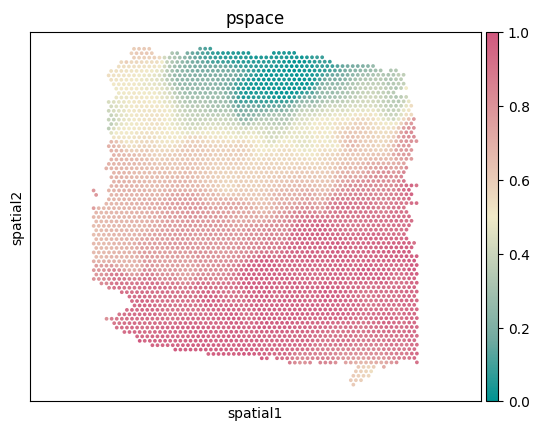

In [14]:
# Visualize spatial coordinates in a scatterplot colored by pspace
ax = sc.pl.embedding(adata,basis='spatial',color='pspace',show=False,color_map=cmp_pspace)
ax.axis('equal')
#plt.savefig('figures/DLPFC_pspace.png',bbox_inches='tight',transparent=True,dpi=400)
#plt.savefig('figures/DLPFC_pspace.pdf',bbox_inches='tight',transparent=True,dpi=400)



(2755.35, 12383.65, 2191.15, 12197.85)

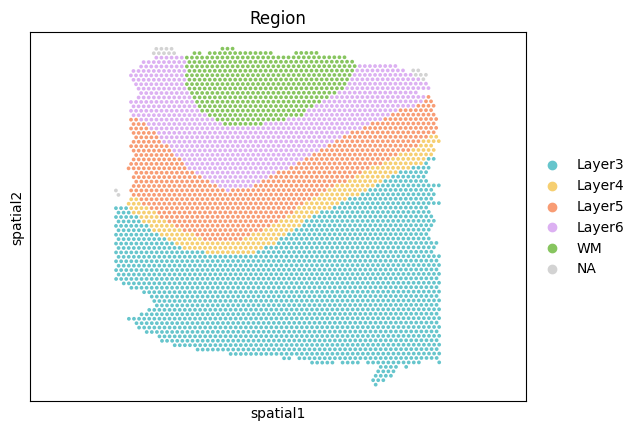

In [15]:
# Visualize spatial coordinates in a scatterplot colored by Region
ax = sc.pl.embedding(adata,basis='spatial',color='Region',show=False,palette=cmp_domain)
ax.axis('equal')
#plt.savefig('figures/seqFISH_ct.png',bbox_inches='tight',transparent=True,dpi=400)
#plt.savefig('figures/seqFISH_ct.pdf',bbox_inches='tight',transparent=True,dpi=400)

